# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import pandas as pd

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [40]:
print(weather_api_key)

c3fcb27f9ffa3fa9aeef94654399f396


### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # pprint(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | palamos
Processing Record 5 of Set 1 | winnemucca
Processing Record 6 of Set 1 | genhe
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | quellon
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | ketchikan
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | peniche
Processing Record 18 of Set 1 | rongelap
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | nikolayevsk-on-amure
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
dtype: int64

In [44]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,puerto ayora,-0.7393,-90.3518,296.23,100,73,2.68,EC
1,badger,64.8000,-147.5333,270.08,91,100,0.00,US
2,port-aux-francais,-49.3500,70.2167,279.40,96,100,14.09,TF
3,palamos,41.8484,3.1291,287.90,6,29,2.09,ES
4,winnemucca,40.9730,-117.7357,283.24,25,100,1.75,US


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,296.23,100,73,2.68,EC
1,badger,64.8000,-147.5333,270.08,91,100,0.00,US
2,port-aux-francais,-49.3500,70.2167,279.40,96,100,14.09,TF
3,palamos,41.8484,3.1291,287.90,6,29,2.09,ES
4,winnemucca,40.9730,-117.7357,283.24,25,100,1.75,US


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

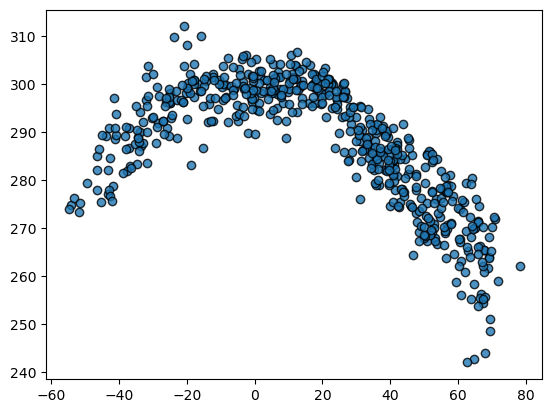

In [52]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("Latitude Vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

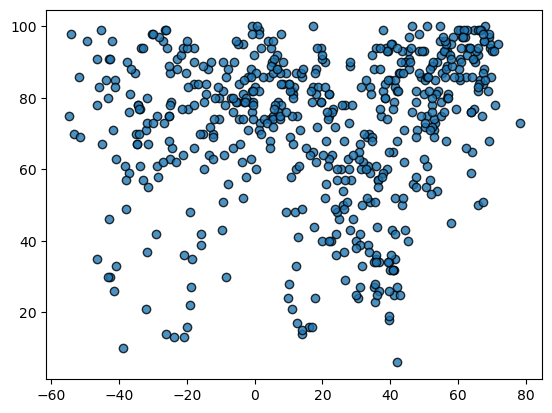

In [53]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

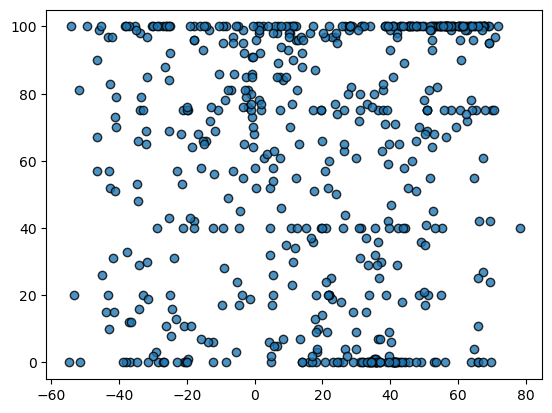

In [55]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

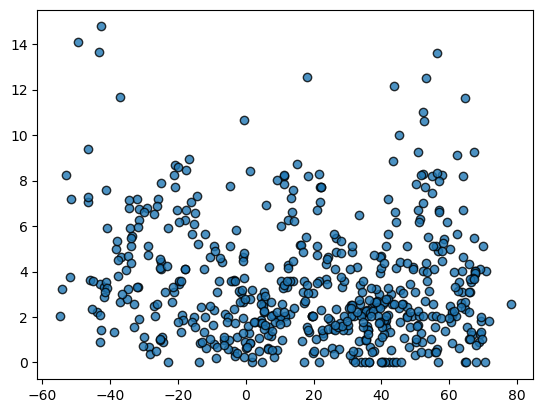

In [56]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
import matplotlib .pyplot as plt
import seaborn as sns

def linear_regression_lot(x, y, city_data_df, title):
    fig, ax = plt.subplots()
    sns.regplot(x=x, y=y, data=city_data_df, ax=ax)
    plt.show()


In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northen_hemi = city_data_df.loc[city_data_df['Lat'] >= 0]
northen_hemi_df = pd.DataFrame(northen_hemi)

# Display sample data
northen_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
1,badger,64.8000,-147.5333,270.08,91,100,0.00,US
3,palamos,41.8484,3.1291,287.90,6,29,2.09,ES
4,winnemucca,40.9730,-117.7357,283.24,25,100,1.75,US
5,genhe,50.7833,121.5167,267.40,61,69,1.63,CN
10,whitehorse,60.7161,-135.0538,267.65,85,75,2.06,CA


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,296.23,100,73,2.68,EC
2,port-aux-francais,-49.3500,70.2167,279.40,96,100,14.09,TF
6,papatowai,-46.5619,169.4708,285.06,78,67,7.04,NZ
7,atafu village,-8.5421,-172.5159,299.85,86,100,3.10,TK
8,quellon,-43.1167,-73.6167,277.12,80,97,3.44,CL


###  Temperature vs. Latitude Linear Regression Plot

Text(1, 1, 'y = -0.61x + 307.07')

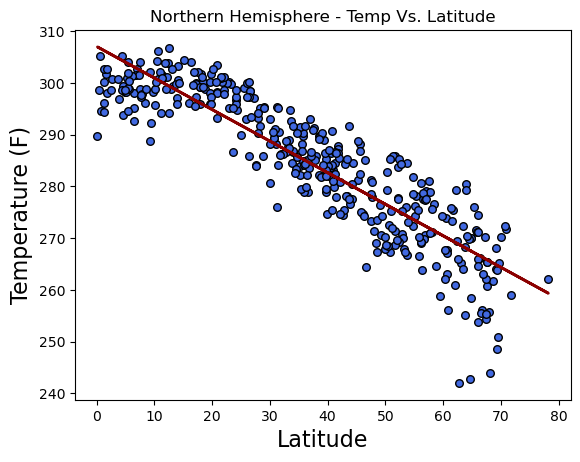

In [86]:
# Linear regression on Northern Hemisphere
x_values = northen_hemi_df['Lat']
y_values = northen_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[30], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Temp Vs. Latitude')
plt.ylabel('Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')



Text(1, 1, 'y = 0.39x + 302.93')

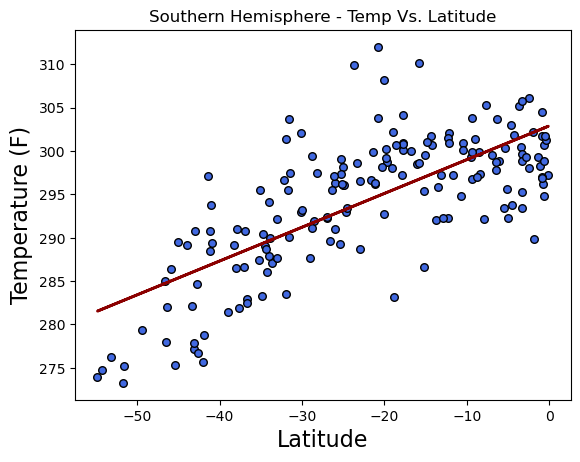

In [85]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[30], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Southern Hemisphere - Temp Vs. Latitude')
plt.ylabel('Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=15, color='darkred')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(1, 1, 'y = 0.26x + 62.14')

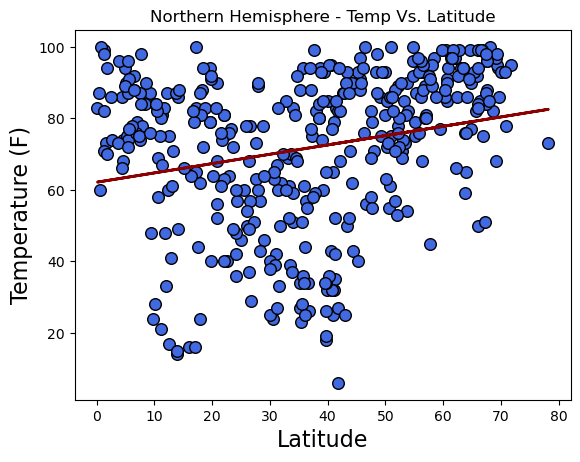

In [87]:
# Northern Hemisphere
x_values = northen_hemi_df['Lat']
y_values = northen_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Humidity Vs. Latitude')
plt.ylabel('Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=15, color='darkred')

Text(1, 1, 'y = 0.15x + 75.52')

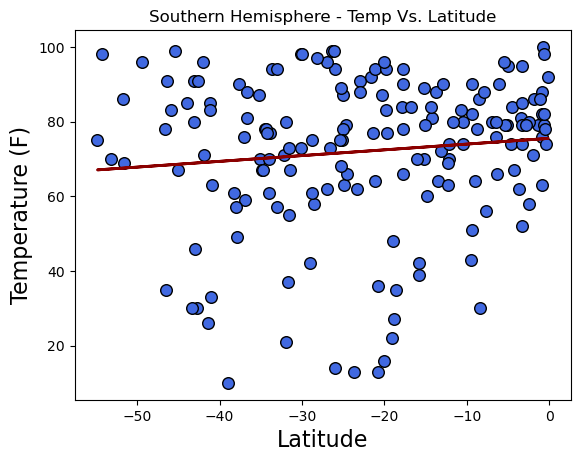

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Southern Hemisphere - Humidity Vs. Latitude')
plt.ylabel('Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=15, color='darkred')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(1, 1, 'y = 0.32x + 47.8')

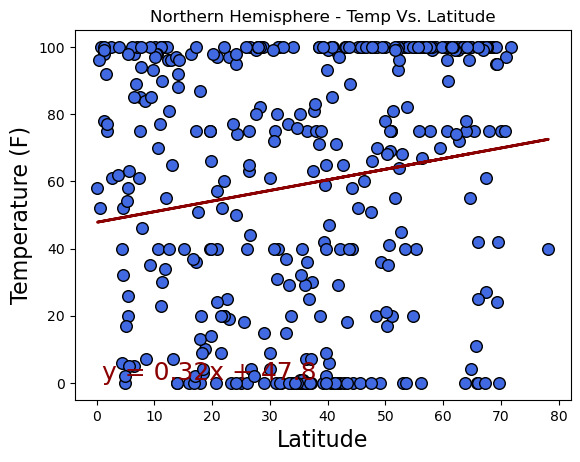

In [90]:
# Northern Hemisphere
x_values = northen_hemi_df['Lat']
y_values = northen_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Cloudiness Vs. Latitude')
plt.ylabel('Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=15, color='darkred')

Text(1, 1, 'y = 0.39x + 67.2')

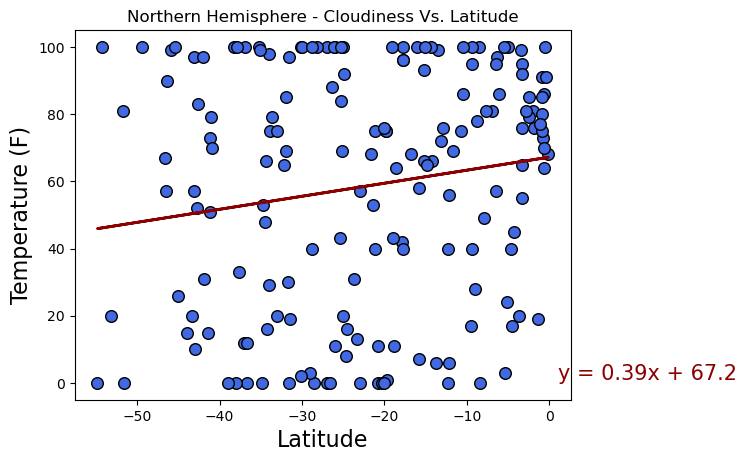

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Cloudiness Vs. Latitude')
plt.ylabel('Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=15, color='darkred')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(1, 1, 'y = 0.01x + 2.65')

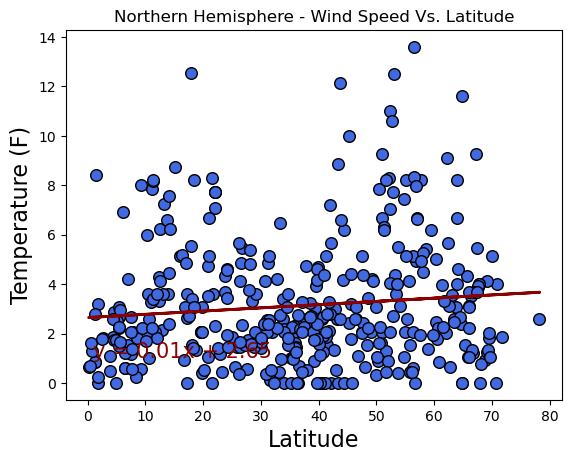

In [93]:
# Northern Hemisphere
x_values = northen_hemi_df['Lat']
y_values = northen_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Wind Speed Vs. Latitude')
plt.ylabel('Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=15, color='darkred')

Text(1, 1, 'y = -0.06x + 2.7')

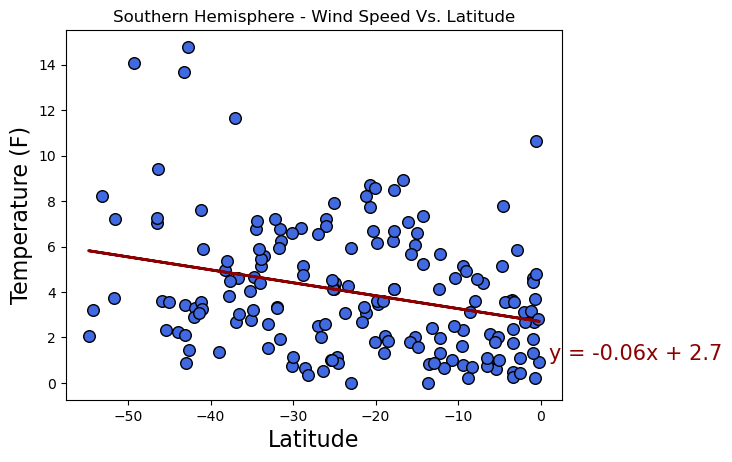

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Southern Hemisphere - Wind Speed Vs. Latitude')
plt.ylabel('Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=15, color='darkred')

**Discussion about the linear relationship:** YOUR RESPONSE HERE